# Basic ML 
* 본격적인 Machine Learning에 대한 구체적 진입 이전에, Machine Learning에 대한 전반적인 기본사항을 알아봅니다. 

# Simple Linear Regression
* simple 이라는 말과는 다르게, Simple Linear Regression은 머신러닝 전반을 관통하는 개념을 담고 있습니다. 
* 특히, 비용의 개념과 비용 최소화의 개념은 MachineLearning의 핵심입니다. 

## Regression 
* Regression - "Regression toward the mean" 어떤 데이터 사이에서 개별 데이텀이 극단적으로 크거나 작은 값이 나온다고 할지라도, 결국 전체적인 측면에서의 데이터는 평균으로 돌아가려는(회귀하려는) 어떠한 특성을 지닌다. ***Francis Galton***  

* Linear Regression은 데이터를 가장 잘 설명하는 직선의 방정식을 구하는 과정이다. 즉, 데이터를 가장 잘 설명하는 직선의 **기울기**와 **편향**을 찾는 과정이다.

* 이때, $$H(x) = Wx + b$$를 우리의 가설(Hypothesis)이라고 한다. 

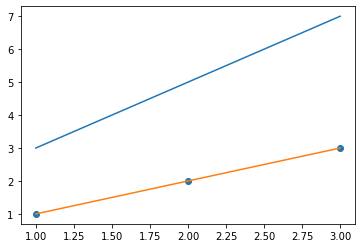

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# 실제 데이터 
x = np.array([1.,2.,3.])
y = [1.,2.,3.]

# 예측 회귀선 
# H(x) = Wx + b 에서, w와 b가 각각 2와 1인 경우 
H = 2*x + 1

# 예측 회귀선이 데이터를 완벽히 설명하는 경우 
H2 = x

plt.scatter(x,y)
plt.plot(x,H)
plt.plot(x,H2)

그렇다면, 어떤 선이 가장 데이터를 잘 설명한다고 할 수 있을까?   
이를 수학적인 개념으로 설명하기 위해서는 비용(cost)의 개념과 비용함수, 비용 최소화에 대한 개념을 알아야 한다. 

## Cost와 Cost Funtion 

##### Cost - 실제 값과 우리의 가설이 예측한 값의 차이(=loss =error)
$$H(x_i) - y_i$$  
##### Cost Function은 전체 데이터를 기반으로 전체 오차의 합을 수식화 한 개념이다. 하지만, 단순히 합할 경우 -+가 공존할 수 있어, 대체적으로 아래의 방식으로 cost Function을 정의한다. 
$$cost(W) = 1/m * \sum_{i=1}^{m} (H(x_i) -y_i)^2$$

* ML의 목적인 Learing의 과정은 이러한 Cost Funtion을 최소화 하는 W와 b의 값을 찾는 것이다.

## Tensorflow를 활용한 구현 

### building hypothesis and cost 

In [2]:
import tensorflow as tf

$$H(x) = W*x + b$$

In [3]:
### 가설함수 구현 ### 
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

# 초기 가중치는 임의로 지정 가능하다. 실제로, 대부분의 경우 random값을 도입하여 사용한다. 
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# 가설 H(x) = W*x +b
hypothesis = W * x +b

$$cost(W) = 1/m * \sum_{i=1}^{m} (Wx_i -y_i)^2$$

In [4]:
cost = tf.reduce_mean(tf.square(hypothesis - y))

# tf.reduce_mean 은 차원을 하나 줄이면서 평균을 구해주는 tf의 평균 메소드 
# tf.square는 제곱을 해준다. 

### Gradient descent - 경사 하강법 
* cost minimize문제에 가장 많이 활용되는 알고리즘이다. 
$$minimize_{W,b} cost(W,b)$$
* 즉, cost를 최소화하는 W,b를 미분을 통해 도출하는 방식이다.

In [5]:
# learning_rate initialize
learning_rate = 0.01

# Gradient descent
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
# cost를 W와 b로 미분한 값을 순서대로 구해줍니다. 
W_grad, b_grad = tape.gradient(cost, [W, b])

# 학습율은 기본적으로 작은 값을 반영해줍니다. 
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

# A.assign_sub(B) 메소드는 A = A-B 를 의미합니다. 

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.376>

##### Parameter Update 
* 위에서 구한 미분값을 반영해 W와 b를 조금 변동시키는 과정입니다. 

In [6]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    # 모든 로그를 보여주는것이 아닌 10번당 한번의 로그를 보여줍니다. 
    if i % 10 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059


### 전체 학습 과정 코드 

In [7]:
import tensorflow as tf

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

for i in range(100+1): # W, b update
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    2.4520|     0.376| 45.660004
   10|    1.1036|  0.003398|  0.206336
   20|    1.0128|  -0.02091|  0.001026
   30|    1.0065|  -0.02184|  0.000093
   40|    1.0059|  -0.02123|  0.000083
   50|    1.0057|  -0.02053|  0.000077
   60|    1.0055|  -0.01984|  0.000072
   70|    1.0053|  -0.01918|  0.000067
   80|    1.0051|  -0.01854|  0.000063
   90|    1.0050|  -0.01793|  0.000059
  100|    1.0048|  -0.01733|  0.000055


# Cost Minimiztion (detail) 
* 구체적인 비용최소화 방식인 Gradient Descent Method에 대한 내용을 자세히 살펴봅니다.
* 특히 이전에 tf.GradientTape()메소드를 통해 추적한 Gradient 값에 대해, 더욱 low level에서의 작동 방식을 살펴봅니다. 

## 가설함수와 비용함수

* 기존의 가설함수와 비용함수 
$$H(x) = W*x + b$$
$$cost(W) = 1/m * \sum_{i=1}^{m} (H(x_i) -y_i)^2$$

수학적으로 보다 원활하게 해석 하기 위해, 가설함수를 간소화 합니다. 이로인해, 새로 변화한 가설함수와 비용함수는 아래와 같습니다. 
##### 가설함수 
$$H(x) = W*x$$
##### 비용함수 
$$cost(W) = 1/m * \sum_{i=1}^{m} (Wx_i -y_i)^2$$

***이제 위에서 정의한 비용함수가 어떻게 작동하는지 살펴 보겠습니다.***

$$cost(W) = \frac{1}{m} * \sum_{i=1}^{m} (Wx_i -y_i)^2$$

$$ W = 0, cost(w) = 4.67 || \frac{1}{3}((0*1 - 1)^2 + (0*2 - 2)^2 + (0*3 - 3)^2)$$

$$W = 1, cost(w) = 0 || \frac{1}{3}((1*1 - 1)^2 + (1*2 - 2)^2 + (1*3 - 3)^2)$$

$$W = 2, cost(w) = 4.67 || \frac{1}{3}((2*1 - 1)^2 + (2*2 - 2)^2 + (2*3 - 3)^2)$$

$$W = 3, cost(w) = 18.67 || \frac{1}{3}((3*1 - 1)^2 + (3*2 - 2)^2 + (3*3 - 3)^2)$$



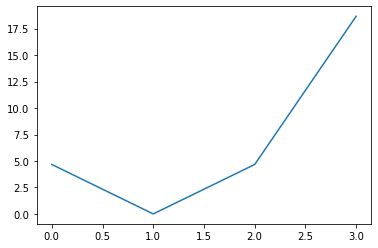

In [8]:
W = (0,1,2,3)
cost = (4.67, 0, 4.67, 18.67)

plt.plot(W,cost)

## 작동 방식 
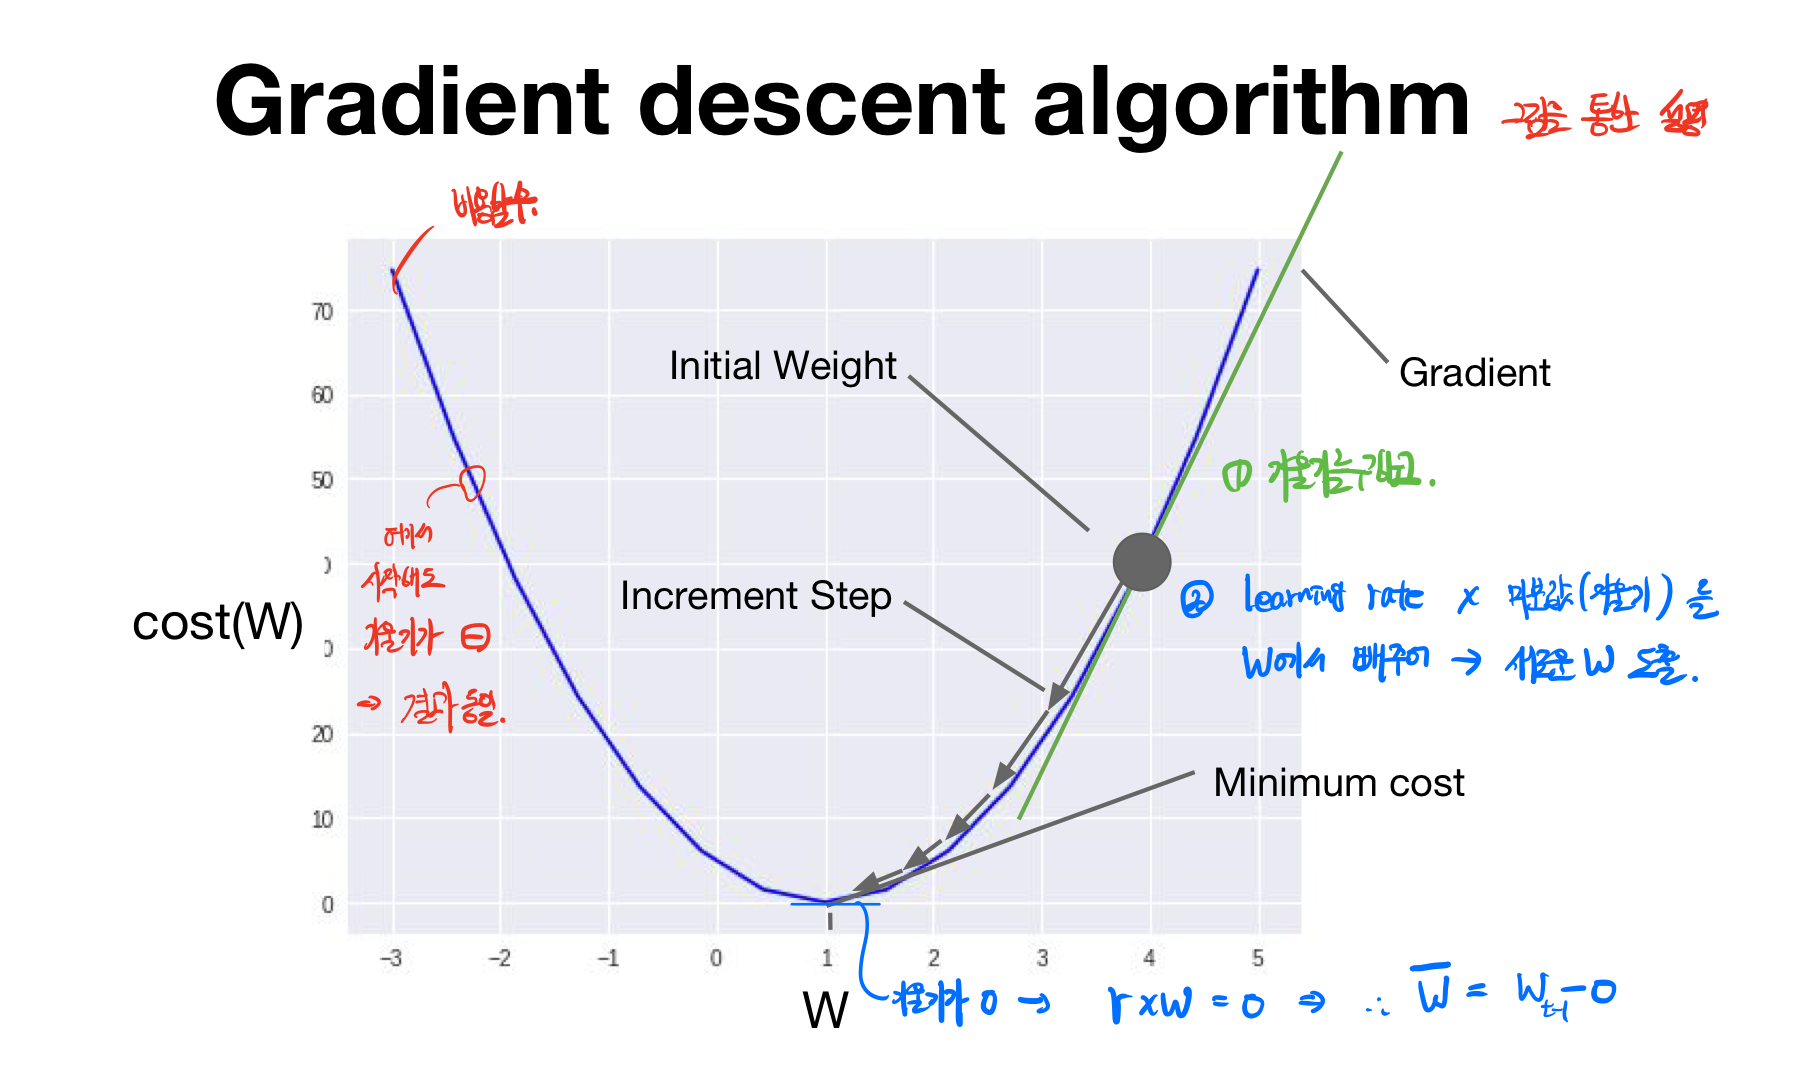
* W = W - (LR * W)의 방식으로 W의 값을 지속적으로 감소시켜 갑니다. 

## 프로그램을 통한 구현 

In [9]:

# cost 계산

W = 0
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 1
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 2
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 3
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

4.666666666666667
0.0
4.666666666666667
18.666666666666668


In [10]:
data = [
    (1, 1),
    (2, 2),
    (3, 3),
]

def cost_func(w, data):
    s = 0
    m = len(data)
    for v in data:
        s += (w*v[0] - v[1]) ** 2
    return s/m

In [11]:
print( cost_func(0, data) )
print( cost_func(1, data) )
print( cost_func(2, data) )
print( cost_func(3, data) )

4.666666666666667
0.0
4.666666666666667
18.666666666666668


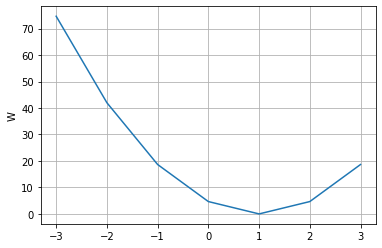

In [12]:

%matplotlib inline
import matplotlib.pyplot as plt

w_vals = range(-3, 4)
cost_vals = [cost_func(w, data) for w in w_vals]

plt.plot(w_vals, cost_vals)
plt.ylabel('cost')
plt.ylabel('W')
plt.grid()

## Gradient Descent Algorithm 

* cost를 최소화 하는 대표적인 알고리즘
* 다수의 변수에도 적용이 가능
$$ W\leftarrow W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ (Wx^{ i }-y^{ i })x^{ i } }  $$
* liner regression 의 핵심 알고리즘
* cost function을 설계할때 반드시 convex function 이어야 한다

In [13]:
# import tensorflow as tf

# x_data = [1, 2, 3]
# y_data = [1, 2, 3]

# W = tf.Variable(tf.random_normal_initializer([1], -1.0, 1.0))
# b = tf.Variable(tf.random_normal_initializer([1], -1.0, 1.0))

# X = tf.placeholder(tf.float32)
# Y = tf.placeholder(tf.float32)

# hypothesis = W * X + b

# cost = tf.reduce_mean(tf.square(hypothesis - Y))

# a = tf.Variable(0.1) 
# optimizer = tf.train.GradientDescentOptimizer(a)
# train = optimizer.minimize(cost)

# sess = tf.Session()
# sess.run(tf.initializers.global_variables())

# for step in range(1000):
#     sess.run(train, feed_dict={X: x_data, Y: y_data})
#     if step % 100 == 0:
#         print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))

In [14]:
# # predict

# print(sess.run(hypothesis, feed_dict={X: 5}))
# print(sess.run(hypothesis, feed_dict={X: 2.5}))

# Multi-variable Linear Regression

## 다변량 회귀 분석이란? 
* 우리가 앞서 살펴본 1개의 독립변수를 통해 1개의 종속변수를 설명하는 회귀 모형이 아니라,
* 여러개의 설명변수를 통해 1개의 종속변수를 예측하는 모형이다. 

* 회귀의 유형	
    - 일변량(Univariate): 오직 하나의 양적 독립변수(설명변수)  
    - 다변량(Multivariate): 두 개 이상의 양적 독립변수(설명변수)  
    - 단순(Simple): 오직 하나의 종속변수(반응변수)  
    - 다중(Multiple): 두 개 이상의 종속변수(반응변수)  
    - 선형(Linear): 데이터에 대하여 가능한 변환을 취한 후, 모든 계수들이 방정식에 선형적으로 삽입되어 있음.  
    - 비선형(Nonlinear): 종속변수(반응변수)와 일부 독립변수들의 관계가 비선형이거나 일부 계수들이 비선형적으로 나타남. 계수들을 선형적으로 나타나게 하는 어떤 변환도 가능하지 않음.    
    - 분산분석(ANOVA): 모든 독립변수들이 질적 변수임.  
    - 공분산분석(ANCOVA): 어떤 독립변수들은 양적변수이고 다른 독립변수들은 질적변수임.  
    - 로지스틱(Logistic): 종속변수(반응변수)가 질적변수임.  

##### 기존의 단순회귀 모형의 가설 
$$ H(x) = w x + b $$
##### 다변량 회귀모형의 가설 
$$ H(x) = w x + b $$$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

## 다변량 회귀 분석을 위한 Matrix의 필요성

* 위와 같이, 변수의 갯수가 3개인 경우, 별 차이가 나진 않지만, 변수의 갯수가 증가할수록 계산과 수식작성, 성능적 측면에서의 어려움이 존재합니다. 
* 따라서, 우리는 아래와 같은 수식을 
$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$
* 행렬을 통해 보다 간단하게 표현 가능합니다.  
$$ H(x) = XW+ b $$

## 실제 코드를 통한 구현 

### 행렬연산을 이용하지 않는 경우 

In [15]:
tf.random.set_seed(0)  # for reproducibility

# 데이터 입력 
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

# 가중치 초기화 과정 
# -10 ~ 10 사이의 임의의 숫자를 1행1열(Scaler)로 생성
W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

# 학습률 지정 (Gradient descent Algorthim의 핵심은 아주 작은 학습률을 적용하는것입니다. ) 
learning_rate = tf.Variable(0.001)

# 반복문을 통해 총 10001번의 학습(가중치 업데이트)을 진행합니다. 
for i in range(1000 + 1):
    # GradientTape method 를 활용하여 비용함수의 미분값을 추적합니다. 
    with tf.GradientTape() as tape:
        hypothesis = W1*x1_data +W2*x2_data + b
        cost = tf.reduce_mean(tf.square(hypothesis-y_data))
    W1_grad, W2_grad, b_grad = tape.gradient(cost,[W1, W2, b])# 각각의 미분 값을 담습니다. 
    
    # 도출된 미분값과 학습률을 적용해 가중치를 업데이트 합니다. 
    W1.assign_sub(learning_rate*W1_grad)
    W2.assign_sub(learning_rate*W2_grad)
    b.assign_sub(learning_rate*b)
    
    # 50회 반복시 마다 로그를 출력합니다. 
    if(i%50 ==0):
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))
        
        

    0 | 335.280823 |    -4.0663 |     1.1220 |  -6.089628
   50 |  85.425072 |    -0.7327 |     1.6704 |  -5.792490
  100 |  24.187962 |     0.8770 |     2.0086 |  -5.509847
  150 |   9.074917 |     1.6366 |     2.2077 |  -5.240999
  200 |   5.217192 |     1.9780 |     2.3149 |  -4.985268
  250 |   4.088459 |     2.1142 |     2.3619 |  -4.742013
  300 |   3.613041 |     2.1508 |     2.3699 |  -4.510631
  350 |   3.293272 |     2.1396 |     2.3528 |  -4.290537
  400 |   3.015087 |     2.1062 |     2.3202 |  -4.081183
  450 |   2.755594 |     2.0632 |     2.2780 |  -3.882044
  500 |   2.512064 |     2.0167 |     2.2306 |  -3.692622
  550 |   2.285186 |     1.9698 |     2.1806 |  -3.512443
  600 |   2.075505 |     1.9238 |     2.1296 |  -3.341055
  650 |   1.882928 |     1.8794 |     2.0790 |  -3.178031
  700 |   1.706853 |     1.8368 |     2.0293 |  -3.022961
  750 |   1.546375 |     1.7961 |     1.9811 |  -2.875458
  800 |   1.400436 |     1.7573 |     1.9346 |  -2.735152
  850 |   1.26

1000번의 학습 결과, cost가 0.9로 감소함을 볼 수 있습니다.  
또한, cost의 값이 0에 가까워질수록, cost의 감소폭이 작아짐을 확인할 수 있습니다.  

### 행렬연산을 활용하는 방식

In [16]:
# 데이터 입력 
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]]
y_data  = [1, 2, 3, 4, 5]

# 가중치 초기화. 
# 각각의 가중치에 대해 여러번의 할당을 제공하는 방식이 아니라, 하나의 행렬에 일괄적으로 값을 지정하는 방식 
W = tf.Variable(tf.random.uniform((1,2),-1.0, 1.0)) # -1 ~ 1 사이의 임의의 값을 1행2열 크기로 랜덤지정힙니다. 
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

# 학습률 지정 
learning_rate = tf.Variable(0.001)

# 1000번의 학습(가중치 업데이트) -> 비용함수의 값을 최소화하는 W,b 찾아ㅏ기 
for i in range(1000+1):
    # 위와 동일한 방식으로 Gradient Tape 메소드를 활용합니다. 
    # 여기서 주의할점은 가설함수와 비용함수의 내용이 행렬 연산으로 전환된다는 점입니다. 
    # matmul은 행렬곱(내적)연산을 지원합니다. 
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W,x_data) + b 
        cost = tf.reduce_mean(tf.square(hypothesis-y_data)) 
    W_grad, b_grad = tape.gradient(cost, [W, b])
    
    # 가중치를 학습률에 따라 개선합니다. 
    W.assign_sub(learning_rate*W)
    b.assign_sub(learning_rate*b)
    
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))

    0 |  36.403778 |    -0.6491 |    -0.3637 |  -0.971960
   50 |  34.813438 |    -0.6174 |    -0.3459 |  -0.924534
  100 |  33.334099 |    -0.5873 |    -0.3291 |  -0.879422
  150 |  31.957165 |    -0.5586 |    -0.3130 |  -0.836511
  200 |  30.674744 |    -0.5314 |    -0.2977 |  -0.795694
  250 |  29.479645 |    -0.5054 |    -0.2832 |  -0.756868
  300 |  28.365240 |    -0.4808 |    -0.2694 |  -0.719938
  350 |  27.325466 |    -0.4573 |    -0.2562 |  -0.684809
  400 |  26.354755 |    -0.4350 |    -0.2437 |  -0.651394
  450 |  25.447973 |    -0.4138 |    -0.2318 |  -0.619610
  500 |  24.600439 |    -0.3936 |    -0.2205 |  -0.589376
  550 |  23.807840 |    -0.3744 |    -0.2098 |  -0.560618
  600 |  23.066193 |    -0.3561 |    -0.1995 |  -0.533262
  650 |  22.371841 |    -0.3387 |    -0.1898 |  -0.507242
  700 |  21.721424 |    -0.3222 |    -0.1805 |  -0.482492
  750 |  21.111841 |    -0.3065 |    -0.1717 |  -0.458949
  800 |  20.540232 |    -0.2915 |    -0.1634 |  -0.436555
  850 |  20.00

# Logistic Regression 
* 기존에 학습한 Linear Regression은 연속된 수치형 변수의 예측에 사용되었던 점과는 다르게, 
* Logistic Regression은 불연속적인 수치의 예측, 즉 분류 모형에 사용되는 대표적인 알고리즘 입니다. 

## 학습 내용 

### Logistic Regression 개요 

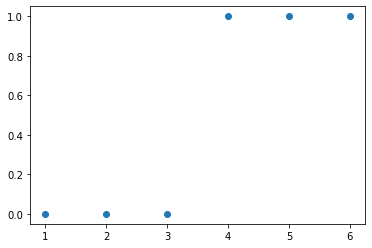

In [17]:
import matplotlib.pyplot as plt 

x = np.array([1,2,3,4,5,6])
y = [0,0,0,1,1,1]
             
plt.scatter(x,y)

* 위와 같은 데이터에, 직선인 회귀선을 구할경우 두가지 문제가 존재합니다. 
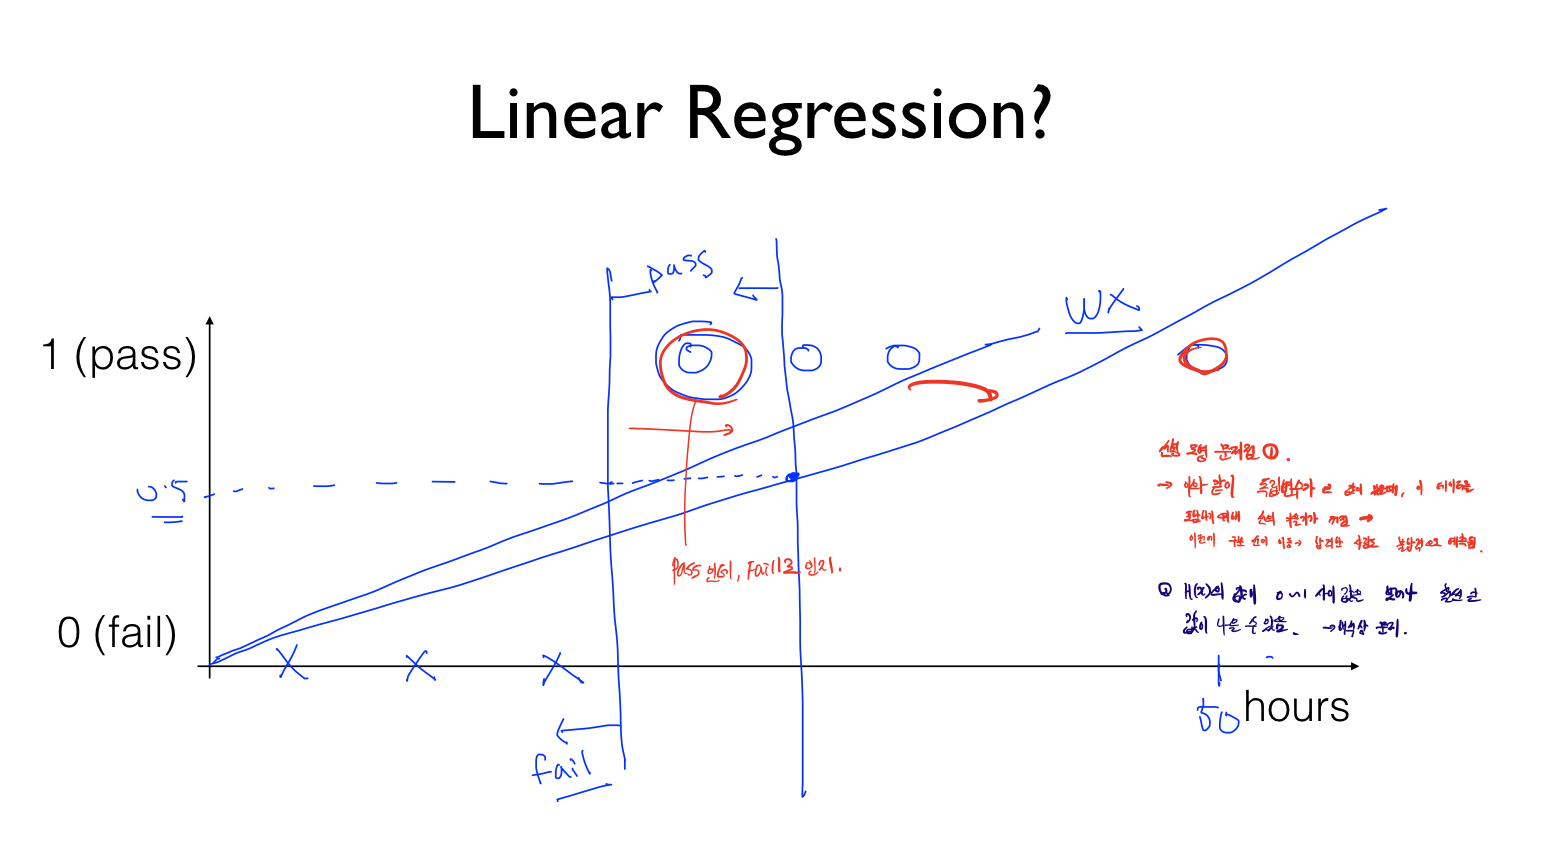

* 따라서 우리는, 데이터의 형태에 맞게, 예측값의 범위를 0에서 1사이로 한정 지을 방법이 필요하며, sigmoid 함수를 이용해 이를 해소하는 방법이 Logisitic Regression입니다. 

* Logistic Regression의 구체적인 방법론 
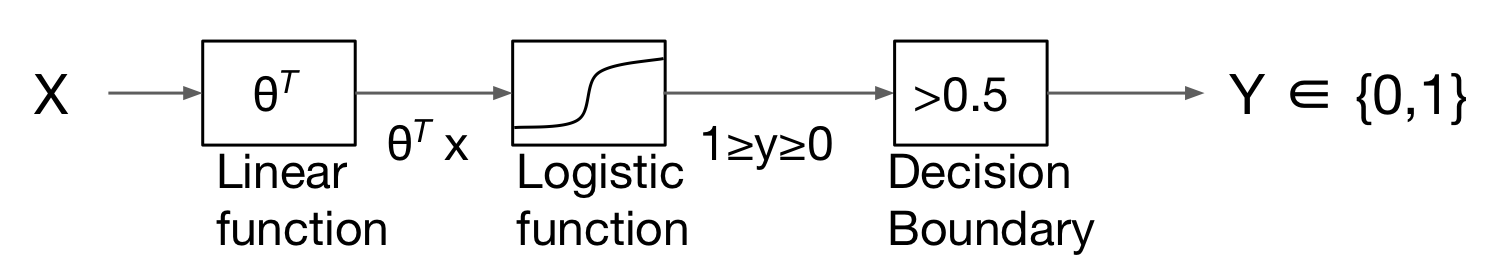    


1. 주어진 X데이터에 각각의 가중치를 적용한 선형 함수값(연속형 수치)을 도출합니다.   

$$Z = W^T * X$$     
2. 도출된 선형함수를 시그모이드 변형을 통해 0에서 1사이의 값을 갖도록 변형합니다.  

$$H(X) = \frac{1}{1-e^(-Z)}$$  
3. 시그모이드 함수를 통해 도출된 값을 Decision Boundary를 기준으로 분류합니다.

### 비용함수와 비용 최소화 
* 기존의 선형함수는 다음과 같은 비용함수를 적용했었습니다.  
$$cost(W) = \frac{1}{m} * \sum_{i=1}^{m} (Wx_i -y_i)^2$$  
해당경우에서는, 함수의 형태가 Convexed Function이었기 때문에, global min과 Local min이 항상 같아, Gradient Descent Algoritm을 즉각 적용이 가능했습니다.  
* 하지만, 로지스틱 모형의 경우, 해당 방식으로의 비용을 지정할 경우, 그래프의 형태가 convexx한 형태를 보이지 않아, global min과 local min이 다를 수 있으먀, 이로 인해 가중치의 시작 위치에 따라 모델이 최종적으로 얻게 되는 가중치가 최적이 아닐 수 있습니다. 
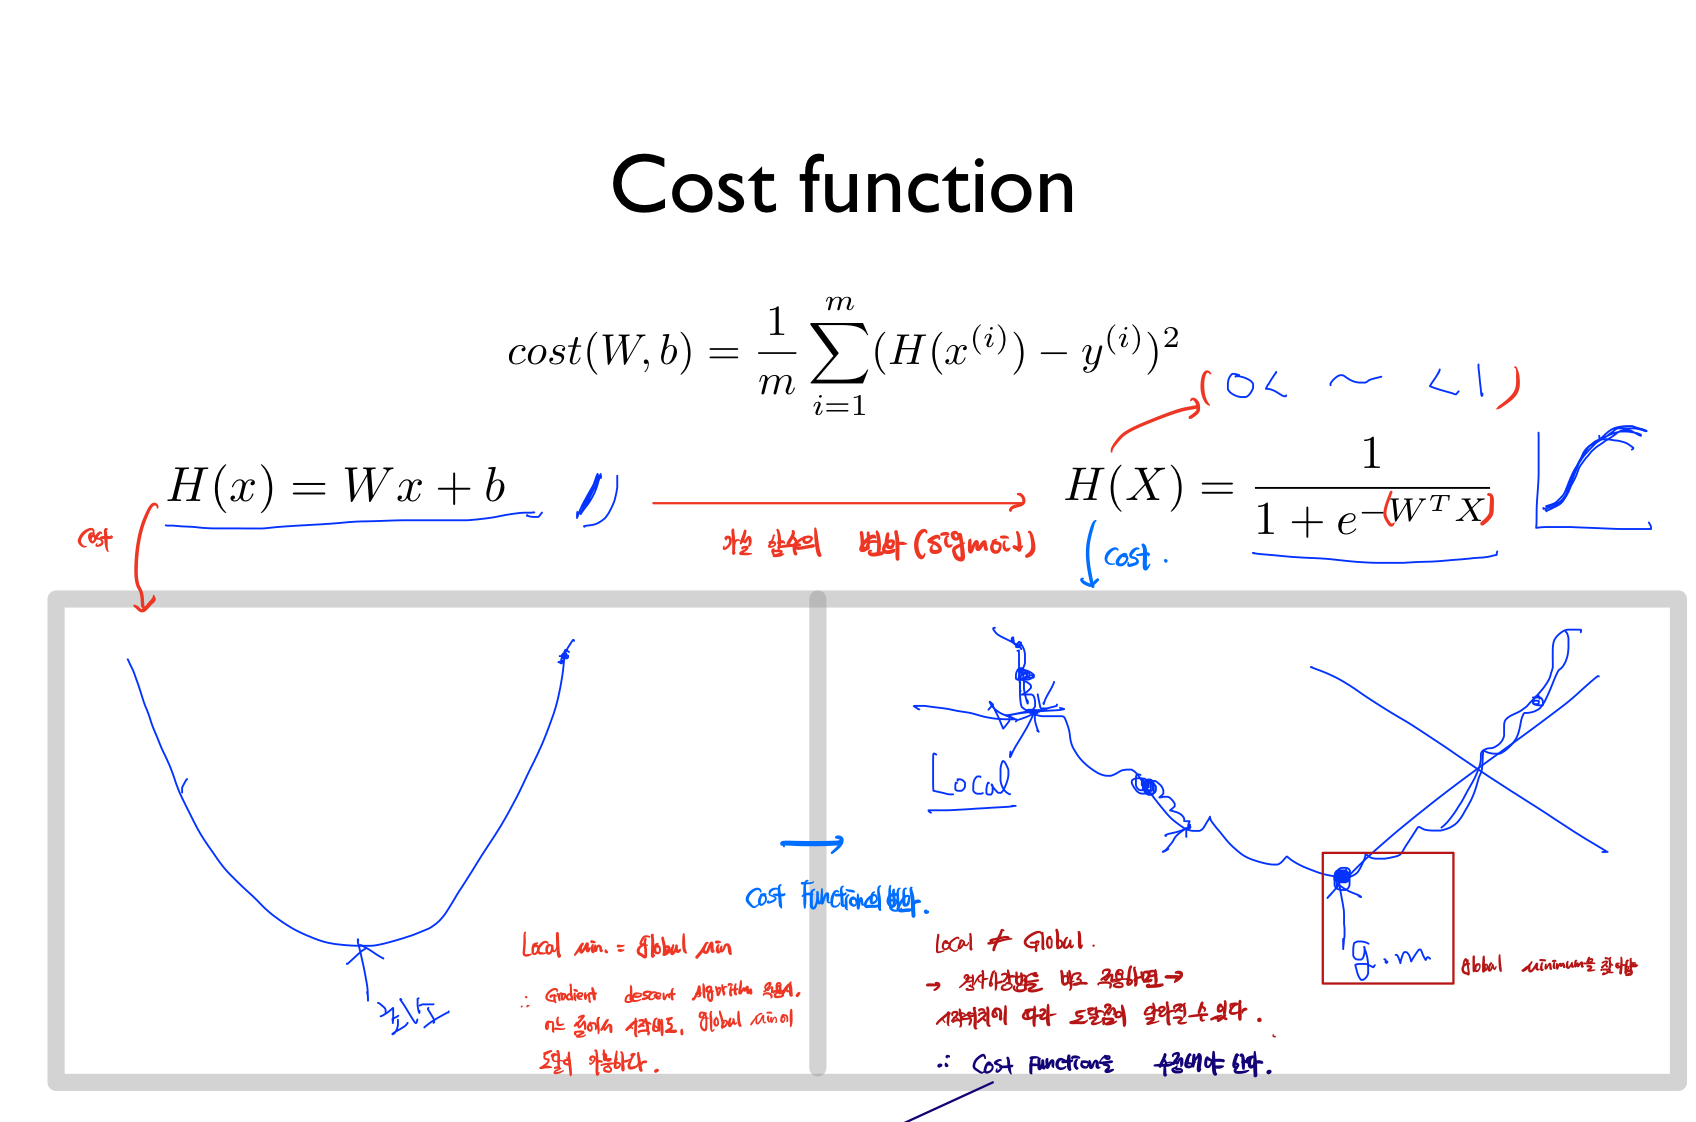  
* 따라서, 우리는 조금 다른형태의 비용함수를 선정합니다. 
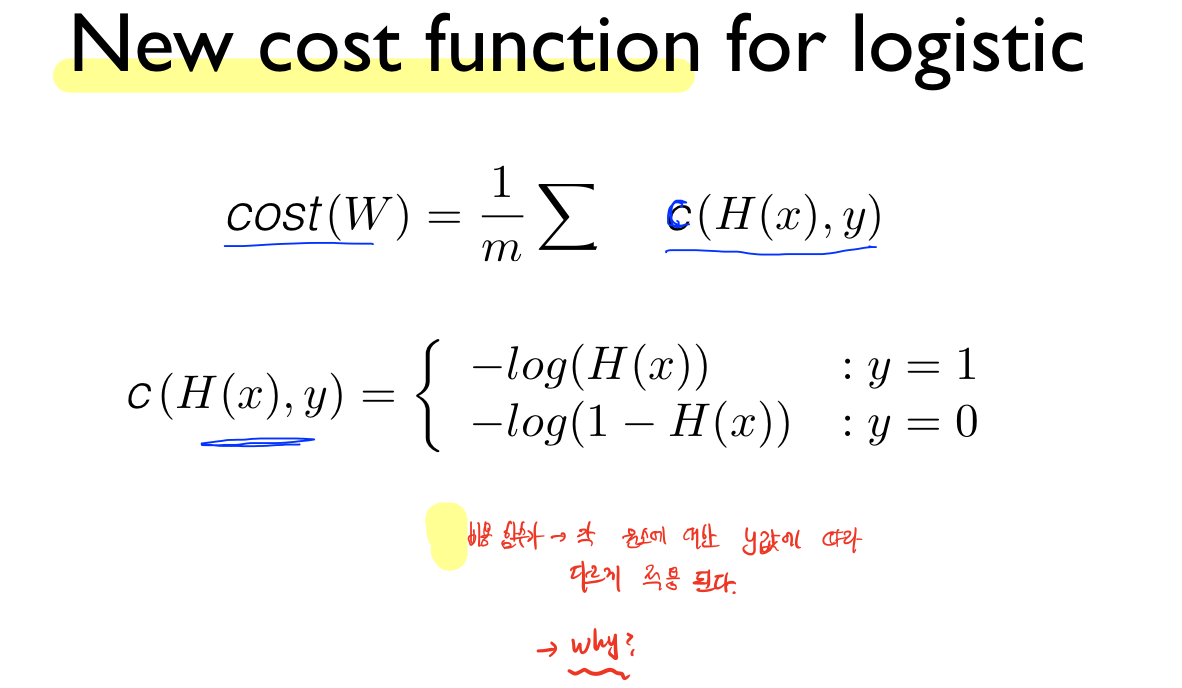  
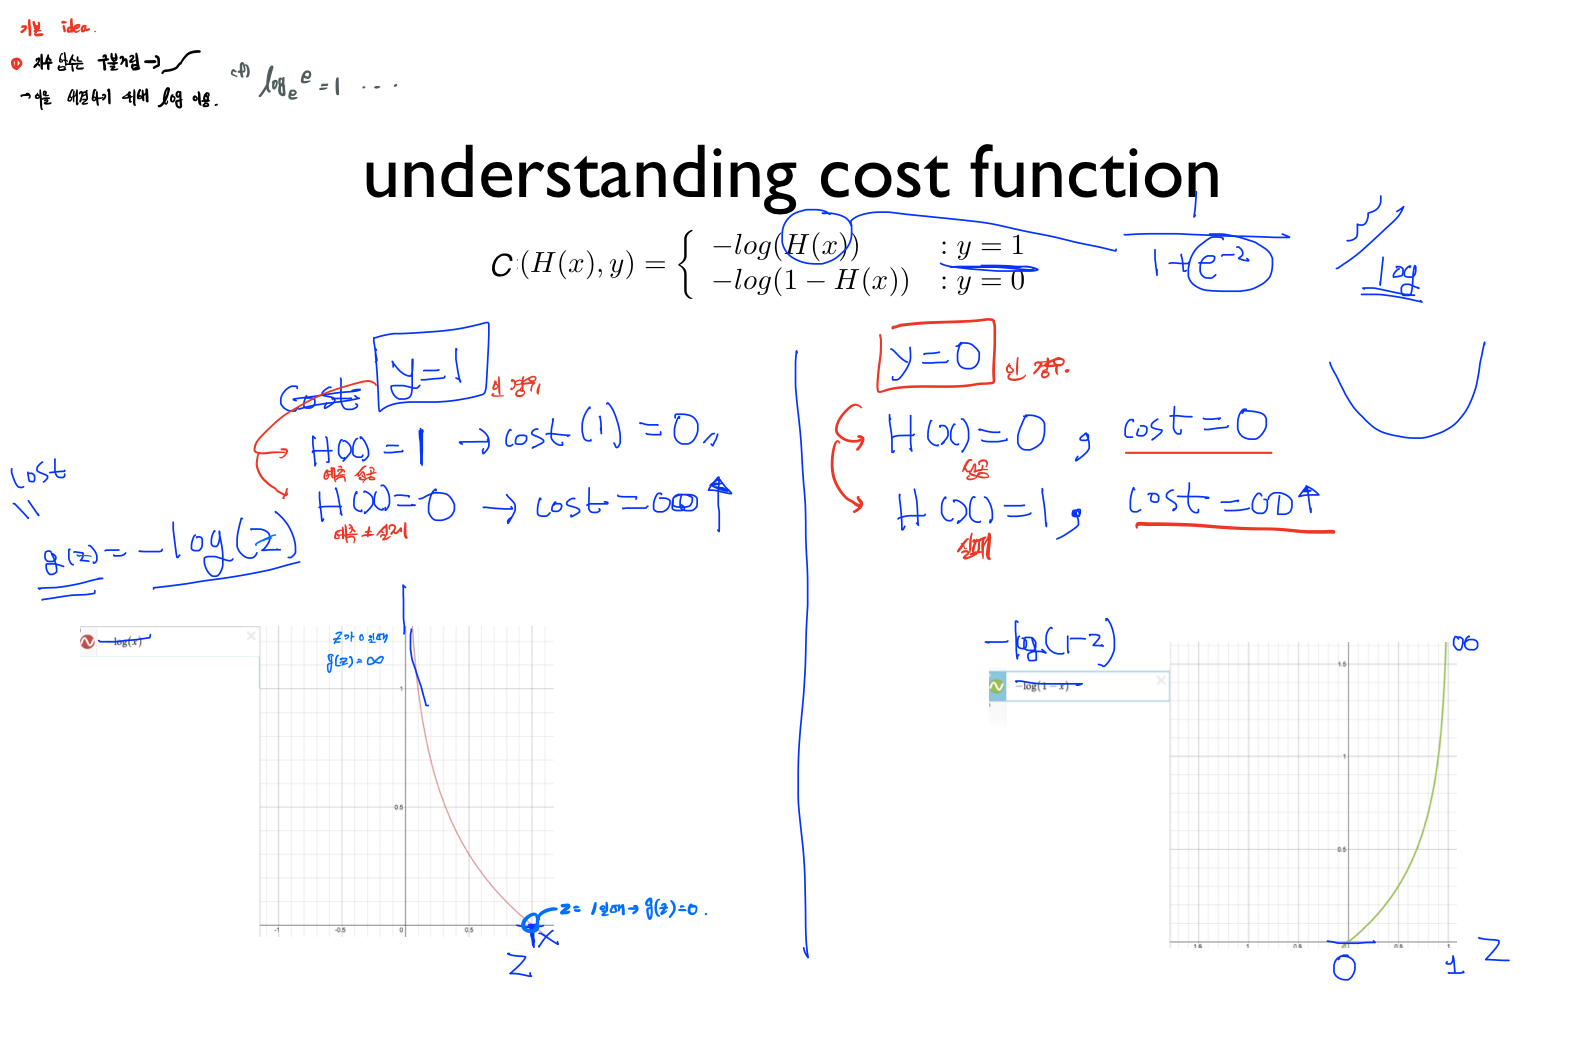  
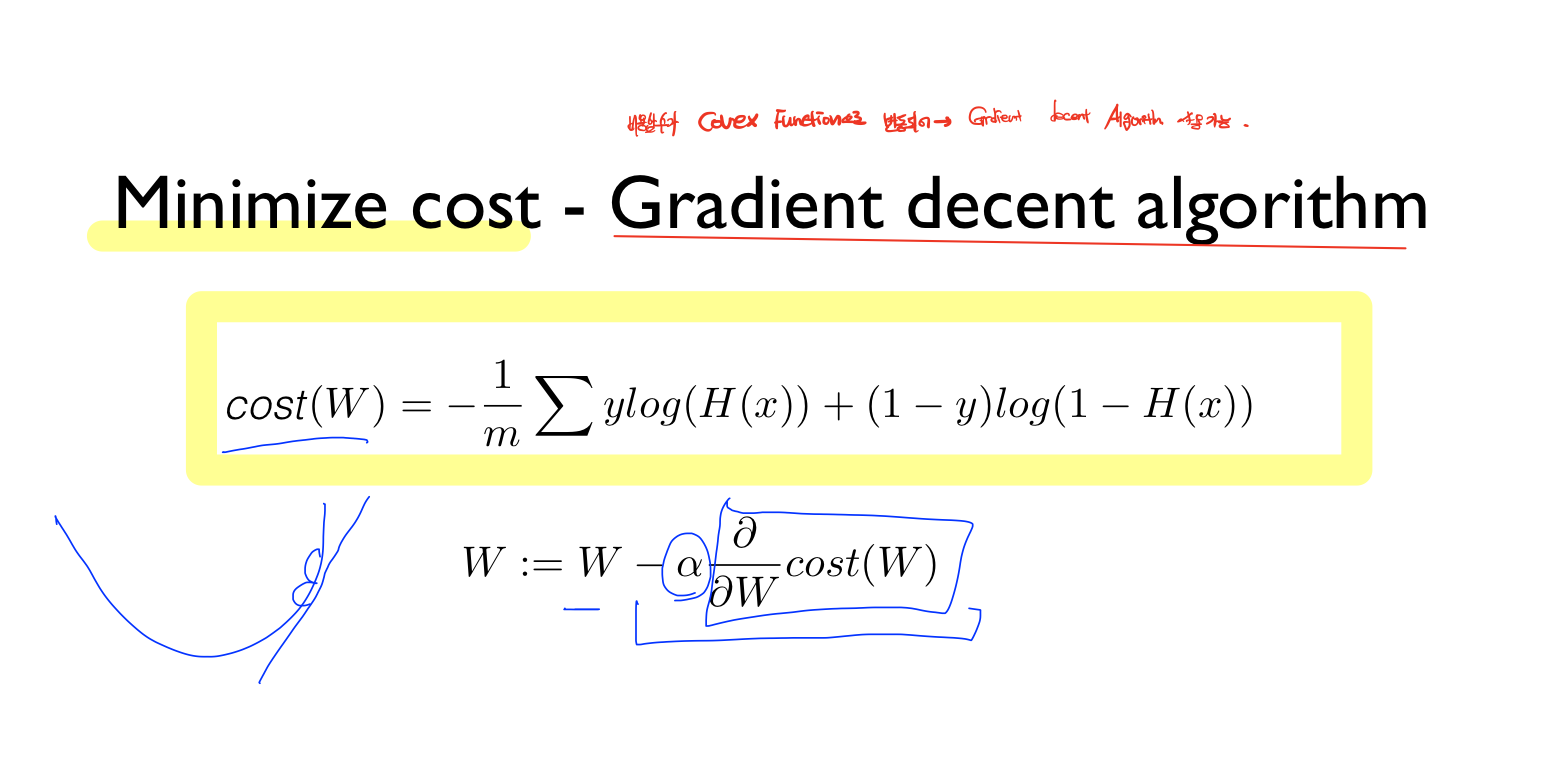

이렇게 비용함수를 적용함으로써, 우리는 비로소 비용최적화에 Gradient Descent 알고리즘을 이용할 수 있습니다.

## 실습 1. 

### 필요 라이브러리 로드 

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

### 데이터 구성 

In [19]:
# 학습에 필요한 데이터와 검증을 위한 데이터 셋을 만듭니다. 
x_train = [[1.,2.],
           [2.,3.],
           [3.,1.],
           [4.,3.],
           [5.,3.],
           [6.,2.]]

y_train = [[0.],
           [0.],
           [0.],
           [1.],
           [1.],
           [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

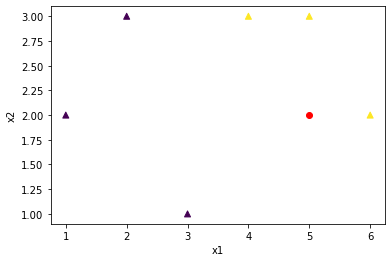

In [20]:
# 데이터의 모습을 시각화 합니다. 

colors = [int(y[0]%3)for y in y_train] # y데이터의 값에 따라 색상을 다르게 적용합니다. 

plt.scatter(x1,x2,c=colors, marker='^') 
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

### TensorFlow를 활용해 Logistic Regression 수행하기 

In [21]:
# Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
# features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(len(x_train))#.repeat()

In [22]:
dataset

# [[[?,?],[?]]
# [[?,?],[?]]
# [[?,?],[?]]
# [[?,?],[?]]
# [[?,?],[?]]
# [[?,?],[?]]]

# 의 형태라고 예상 됩니다. 

<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float32, tf.float32)>

In [23]:
# 가중치와 bias 초기 설정 
# 초기 설정은 모두 0의 형태를 갖는 행렬로 지정합니다. 
W = tf.Variable(tf.zeros([2,1], name='weight')) # x데이터가 1행2열이기 때문에 가중치는 2행1열 
b = tf.Variable(tf.zeros([1], name='bias'))

In [24]:
# 가설함수를 반환하는 함수를 지정합니다. 
def logistic_regression(features): 
    hypothesis = tf.divide(1., (1.+ tf.exp(-tf.matmul(features, W)+b)))
    return hypothesis

# 비용함수를 지정합니다. 
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost


In [25]:
# SGD 옵티마이저를 이용해 최적의 기울기를 도출합니다. (학습과정)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [26]:
# 추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴합니다.
#### Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환합니다.
#### 가설을 통해 실재 값과 비교한 정확도를 측정합니다

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [27]:
# GradientTape를 통해 경사값을 계산합니다.
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [28]:
# 학습을 실행합니다.
# 위의 Data를 Cost함수를 통해 학습시킨 후 모델을 생성합니다.
# 새로운 Data를 통한 검증 수행 [5,2]의 Data로 테스트 수행 (그래프상 1이 나와야 정상입니다)

EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))

test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000


In [29]:
# x= [1,2,3]
# y=['a','b','c']
# print(list(zip(x,y)))

# Softmax classfication 
* softmax는 Multinomial classfication의 대표적인 알고리즘입니다.  
* Multinomial classfication은 주어진 여러개의 feature를 기반으로 여러개의 class중 하나의 값으로 분류하는 모형입니다. 
* softmax regression도 Logistic과 기본적인 컨셉은 동일합니다. 
![image.png](attachment:image.png)
* 하지만, softmax의 경우, 다음과 같은 수식을 이용합니다.   
$$S(y_i) = \frac{e^{y_i}}{\sum_{j}^{} e^{y_j}}$$


## 학습 내용 

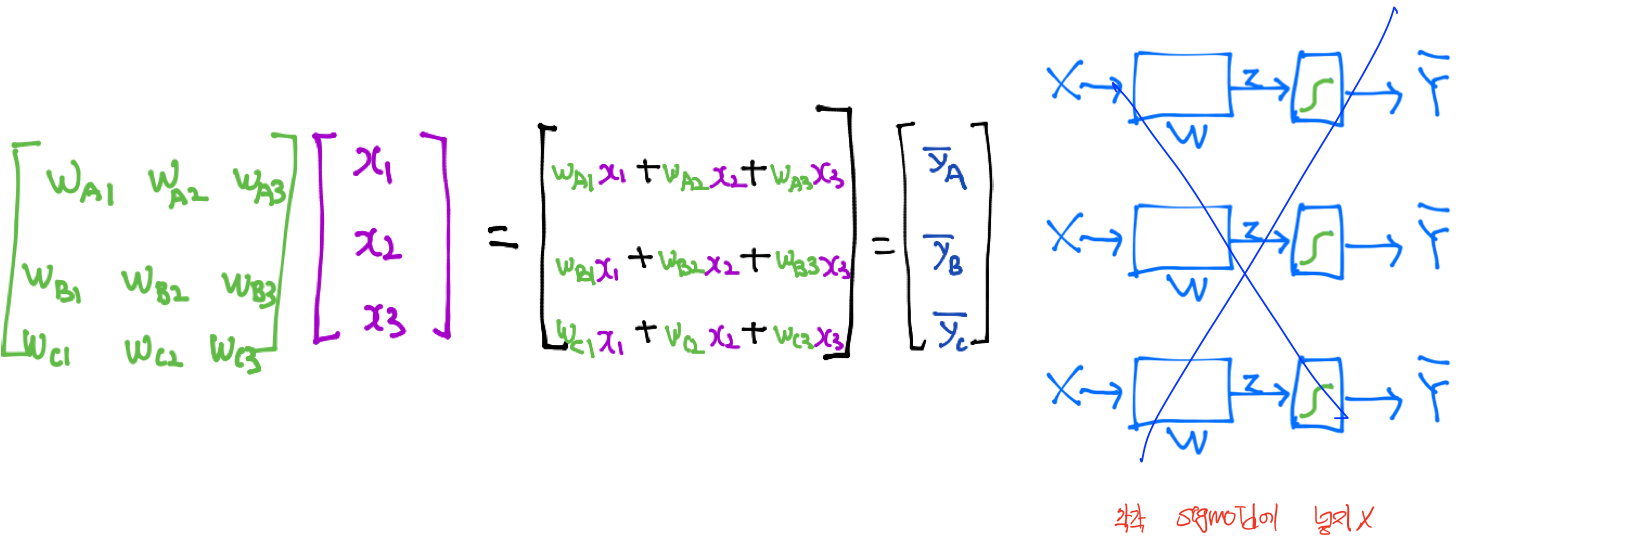
* softmax 분류 또한, 기본적인 개념은 각각의 변수와 가중치를 곱해, 선형의 z값을 구한 후, 이를 변환함수에 투과 하여 차원을 축소하는 방법입니다.
* 하지만, 여러개의 class각각에 대한 확률적 해석이 가능하도록, 각 레코드에 대한결과값의 합이 1이되도록 해야 합니다. 
![image10.png](https://yungis.dev/static/e0d957dec2182a57dddd140d6d9f4bfe/fcda8/20200128ML-15.png)

### 비용함수 - cross entropy

#### cross entropy와 정보이론 

##### 정보량 
* 정보량을 쉽게 말하자면, 어떤 정보가 주는'놀람의 정도'라고 할 수 있습니다. 정보량은어떠한 사건 x가 일어날 확률이 P(x)일때, $$\log{\frac{1}{p(x)}}$$로 표현됩니다. 즉, 어떤 사건이 일어날 확률이 적을수록, 해당 사건이 일어날 때 사람들에게 주는 정보가 더욱 놀라움을 의미합니다. 
* 정보량은 다음과 같은 공식으로 계산합니다.(여기서 a는 사건의 종류에 따라 지정됩니다. 주로 2(bit)를 사용하며, 밑이 e일때 정보량의 단위는 nat(natural unit)이다.(ex) 주사위 던지기에서, a = 6)
$$I(x_j) = \log_{a}^{x_j}$$ 
[참고|| 정보량과 엔트로피의 개념](https://bskyvision.com/389)

##### 엔트로피란? 
* 엔트로피는 정보량의 기댓값(평균)을 의미한다. 위에서 '정보량이 놀람의 정도이다.'라는 말을 기반으로 한다면, entropy는 평균적인 놀람의 정도, 즉 어떤 전체 사건에 대한 평균적인 불확실성을 의미한다고 말할 수 있다. 
$$H(x) = E [I(x_j)] = -\sum_{j=1}^{n} {P(x_j)\log_{2}{P(x_j)}}$$

* 즉, 어떤 사건의 결과가 뻔히 예상될수록 엔트로피가 작고, 사건의 결과가 예상되지 않을수록 entropy가 높다.

ex) 
* 사건1: 내일 해가 동쪽에서 뜨는가?
    - 해가 동쪽에서 뜰 확률 P(x0) = 1, 서쪽에서 뜰 확률 P(x1) = 0 
    $$1(\log_{2}^{1}) + 0(log_{2}^{\frac{1}{0}} = 0$$
* 사건2: 내일 내가 공부를 할 것인가? 
    - 내가 공부를 할 확률 P(x0) = 0.6, 공부를 하지 않고 놀 확률P(x1) = 0.4
    $$0.6(\log_{2}^{\frac{1}{0.6}}) + 0.4(log_{2}^{\frac{1}{0.4}} = 0.398$$

**기본적으로, 머신러닝에서 엔트로피의 개념을 이용하는 이유는, 정보의 불확실성을 수치화 하여, 이를 줄이는 방향으로 학습을 진행해야 하기 때문입니다. 따라서, 정보량의 개념을 비용으로 하여 이러한 비용을 줄이는것이 기본적인 컨셉입니다.

##### cross entopy란? 

#### softmax에서 비용함수의 정의 
* 앞서 언급했듯, 머신러닝에서의 비용은 얼마만큼의 빈도로 실제값과 예측값이 서로 달라지는지를 의미합니다. 
* 이를 비용으로 인식해, 최소로 줄이는것이 우리의 목적입니다. 


* 먼저, 1개의 데이터를 예측한 결과와 실제값을 기준으로 cross entropy를 구하는 방식은 다음과 같습니다.  
$$S_i = \begin{bmatrix}
0.3 \\\\
0.2 \\\\
0.5
\end{bmatrix}, Y_i = \begin{bmatrix}
0 \\\\
0 \\\\
1
\end{bmatrix}$$
예를들어, 위와 같은 경우, cross entropy는 
$$D(S_i,L_i) = -\sum_{j=0}^{n-1}{L_j\log S_j} = \sum_{j=0}^{n-1}{L_j\log {\frac{1}{S_j}}}  (단, n은 class의 갯수를 의미) $$

* 이를 여러개의 데이터가 주어진 경우로 확장해보겠습니다. 
$$S_i = \begin{bmatrix}
0.3&0.5 \\\\
0.2&0.4 \\\\
0.5&0.1
\end{bmatrix}, Y_i = \begin{bmatrix}
0&0 \\\\
0&1 \\\\
1&0
\end{bmatrix}$$
해당경우, 비용함수는 각 데이터에 대한 cross entropy의 평균을 사용합니다.  
$$Loss = \frac{1}{N} \sum_{i} D(S(WX_i +b), L_i) = \sum _{i=0}^{n} {(-\sum_{j=0}^{m-1}{L_j\log S_j})} = \sum_{i=0}^{n-1} {(\sum_{j=0}^{m-1}{L_j\log {\frac{1}{S_j}}})}  (단, m은 class의 갯수를 의미하며, n의 데이터의 수를 의미함) $$

## Tensorflow를 통한 구현 

### 환경 구성 

In [30]:
import tensorflow as tf 
import numpy as np 

tf.random.set_seed(777)
# seed를 고정해 항상 동일한 값을 얻을 수 있도록 해줍니다. 

### 데이터셋 구성 

In [31]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#convert into numpy and float format
# tensorflow를 통해 계산이 가능하도록, array형태로 지정해줍니다.
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

In [32]:
x_data

array([[1., 2., 1., 1.],
       [2., 1., 3., 2.],
       [3., 1., 3., 4.],
       [4., 1., 5., 5.],
       [1., 7., 5., 5.],
       [1., 2., 5., 6.],
       [1., 6., 6., 6.],
       [1., 7., 7., 7.]], dtype=float32)

In [33]:
#dataset을 선언합니다.

dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
# dataset = dataset.repeat().batch(2)

nb_classes = 3 #class의 개수입니다.

print(x_data.shape)
print(y_data.shape)
list(dataset) # x데이터와 y데이터를 묶어준 모습

(8, 4)
(8, 3)


[(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 1., 1.], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 1.], dtype=float32)>),
 (<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 1., 3., 2.], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 1.], dtype=float32)>),
 (<tf.Tensor: shape=(4,), dtype=float32, numpy=array([3., 1., 3., 4.], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 1.], dtype=float32)>),
 (<tf.Tensor: shape=(4,), dtype=float32, numpy=array([4., 1., 5., 5.], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 0.], dtype=float32)>),
 (<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 7., 5., 5.], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 0.], dtype=float32)>),
 (<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 5., 6.], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=

### 초기 가중치 입력

In [34]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.7706481 ,  0.37335402, -0.05576323],
       [ 0.00358377, -0.5898363 ,  1.5702795 ],
       [ 0.2460895 , -0.09918973,  1.4418385 ],
       [ 0.3200988 ,  0.526784  , -0.7703731 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3080608 , -0.13253094,  0.5513761 ], dtype=float32)>


### 가설함수 설정(softmax) 
* softmax함수는 tensorflow에서 제공하는 nn.softmax() 메소드를 이용합니다. 

In [35]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[1.36571964e-02 7.90162385e-03 9.78441238e-01]
 [3.92597765e-02 1.70347411e-02 9.43705440e-01]
 [3.80385250e-01 1.67723164e-01 4.51891571e-01]
 [3.23390484e-01 5.90759404e-02 6.17533624e-01]
 [3.62997389e-06 6.20727292e-08 9.99996305e-01]
 [2.62520202e-02 1.07279625e-02 9.63019967e-01]
 [1.56525111e-05 4.21802753e-07 9.99983907e-01]
 [2.94076904e-06 3.81133276e-08 9.99997020e-01]], shape=(8, 3), dtype=float32)


In [36]:
#  softmax 함수를 직접 구현해봅시다. 
def softmax_ms(matrix):
    # 행렬 각 원소의 값을 지수화 해 하나의 행렬로 구성 
    exp_z = np.exp(matrix)
    # 모든 원소의 지수값의 합 구하기 
    sum_exp = np.sum(exp_z)
    
    # 원소별 계산 
    return exp_z / sum_exp

def hypothesis_ms(X):
    return softmax_ms(tf.matmul(X, W)+b)

print(np.sum(hypothesis_ms(x_data)))

0.9999999


In [37]:
# Softmax onehot test
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))
print(np.argmax(hypothesis(sample_db),1)) # 확률값이 가장 큰 원소를 선택

tf.Tensor([[0.9302204  0.06200533 0.00777428]], shape=(1, 3), dtype=float32)
[0]


### 비용함수 설정 

In [38]:
def cost_fn(X,Y):
    # 데이터를 기반으로 예측값을 만듭니다. 
    logits = hypothesis(X)
    # 각각의 데이텀들에 대한 비용을 구하여 행렬꼴로 만듭니다. 
    cost = -tf.reduce_mean(Y*tf.math.log(logits), axis=1)
    # 각각의 비용을 모두 더해 평균을 산출합니다. 
    cost_mean = tf.reduce_mean(cost)
    
    return cost_mean

print(cost_fn(x_data,y_data))

tf.Tensor(2.02644, shape=(), dtype=float32)


위에서 볼 수 있듯, 전체 데이터에 대한 cross entropy의 평균이 도출됩니다. 

### 편미분값 도출 
* loss minimize를 위해 Gradient Descent 알고리즘을 이용합니다. 
* 이를 위한 미분값을 구할때는 tensorflow에서 제공하는 Gradient Tape을 활용합니다. 

In [39]:
# 우선 GradientTape의 작동 방식을 살펴봅니다. 
# 가장 흔한 x^2 그래프를 통해 기울기를 도츨

x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x*x
dy_dx = tape.gradient(y,x) # y를 x로 미분 
print(dy_dx) # 2x = 2*3 = 6 

tf.Tensor(6.0, shape=(), dtype=float32)


In [40]:
# 이제 실제 학습에서 이용할 미분머신을 구성합니다. 

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)

        return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.0230487 , -0.2169928 ,  0.19394411],
       [-0.50737524, -0.4049543 ,  0.9123296 ],
       [-0.41579425, -0.58703345,  1.0028276 ],
       [-0.40048683, -0.6219744 ,  1.0224613 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.0507097 , -0.11406401,  0.16477372], dtype=float32)>]


### 실제 model 구현 
* 위에서 도출한 가설함수와 비용함수를 기반으로 모형을 설정합니다. 

In [41]:
def fit(X, Y, epochs=2000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)
    
    # epoch 횟수만큼 반복적인 학습을 진행합니다. 
    for i in range(epochs):
        grads = grad_fn(X, Y)
        
        # 옵티마이저는 도출된 가중치와 편향의 기울기를 기반으로 변수값을 최적화 시키는 역할을 진행합니다. 
        # 이전에 W.assign_sub(W)와 같은 역할
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            
fit(x_data, y_data)

Loss at epoch 1: 1.606036
Loss at epoch 100: 0.216617
Loss at epoch 200: 0.192258
Loss at epoch 300: 0.177550
Loss at epoch 400: 0.166831
Loss at epoch 500: 0.158423
Loss at epoch 600: 0.151504
Loss at epoch 700: 0.145609
Loss at epoch 800: 0.140457
Loss at epoch 900: 0.135864
Loss at epoch 1000: 0.131707
Loss at epoch 1100: 0.127898
Loss at epoch 1200: 0.124374
Loss at epoch 1300: 0.121090
Loss at epoch 1400: 0.118011
Loss at epoch 1500: 0.115109
Loss at epoch 1600: 0.112363
Loss at epoch 1700: 0.109757
Loss at epoch 1800: 0.107276
Loss at epoch 1900: 0.104909
Loss at epoch 2000: 0.102646


### 모형을 통한 예측 수행

In [42]:
sample_data = [[2,1,3,2]] # answer_label [[0,0,1]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a, 1)) #index: 2

tf.Tensor([[0.00537584 0.14094663 0.8536776 ]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [43]:
b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1)) # matches with y_data

tf.Tensor(
[[5.42674970e-04 1.48679335e-02 9.84589398e-01]
 [5.37583418e-03 1.40946627e-01 8.53677571e-01]
 [2.45808711e-04 3.03965896e-01 6.95788205e-01]
 [6.41077408e-04 7.26102829e-01 2.73256123e-01]
 [4.54754353e-01 5.20511508e-01 2.47341525e-02]
 [2.35777482e-01 7.63754070e-01 4.68416343e-04]
 [6.36009455e-01 3.63235503e-01 7.55054760e-04]
 [7.92943180e-01 2.06996039e-01 6.08200753e-05]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


높은 정확도로 분류에 성공함을 볼 수 있습니다. 

### 하나의 class로 만들어보기 

In [44]:
class softmax_classifer(tf.keras.Model):
    def __init__(self, nb_classes):
        super(softmax_classifer, self).__init__()
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
        
    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)
    
    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))        
        return cost
    
    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(x_data, y_data)
            grads = tape.gradient(cost, self.variables)            
            return grads
    
    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self.variables))
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))
            
model = softmax_classifer(nb_classes)
model.fit(x_data, y_data)

Loss at epoch 1: 2.472669
Loss at epoch 500: 0.375229
Loss at epoch 1000: 0.229923
Loss at epoch 1500: 0.182148
Loss at epoch 2000: 0.150633


## Fancy Softmax
- cross entropy cost Function을 텐서플로우에서 제공하는 tf.nn.softmax_cross_enstropy_with_logits_v2를 이용해 더 간편하게 구현합니다. 

### 필요 라이브러리 호출

In [45]:
import tensorflow as tf
import numpy as np 

tf.random.set_seed(1) # 항상 같은 결과값을 얻습니다.  

### 데이터 불러오기

In [46]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)

### 데이터 나누기 

In [47]:
# 가장 마지막 열을 목표변수로 설정합니다. 
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

In [48]:
x_data

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]], dtype=float32)

In [49]:
y_data

array([0., 0., 3., 0., 0., 0., 0., 3., 3., 0., 0., 1., 3., 6., 6., 6., 1.,
       0., 3., 0., 1., 1., 0., 1., 5., 4., 4., 0., 0., 0., 5., 0., 0., 1.,
       3., 0., 0., 1., 3., 5., 5., 1., 5., 1., 0., 0., 6., 0., 0., 0., 0.,
       5., 4., 6., 0., 0., 1., 1., 1., 1., 3., 3., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 6., 3., 0., 0., 2., 6., 1., 1., 2., 6., 3., 1., 0.,
       6., 3., 1., 5., 4., 2., 2., 3., 0., 0., 1., 0., 5., 0., 6., 1.],
      dtype=float32)

목표변수의 값이 0에서 6까지의 범주로 되어있기 때문에 원핫 인코딩을 수행합니다. 

In [50]:
nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)

In [51]:
print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


### 가중치 초기화

In [52]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]


### 로짓함수와 가설함수 선언

In [53]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))


### 비용함수의 정의 

In [54]:
# tf.keras.losses.categorical_crossentropy를 이용해 비용함수를 정의합니다. 
# 이때 주의할점은 인자 함수로 로짓함수를 그대로 넣어주는것을 볼 수있습니다. 
def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, 
                                                      from_logits=True)    
    # 평균을 구해 전체 비용을 구합니다. 
    cost = tf.reduce_mean(cost_i)    
    return cost

In [55]:
# 미분은 이전과 동일하게 gradient tape을 이용합니다. 
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads

In [56]:
# 각각의 값이 얼마나 정확히 값을 맞추는지 실제값과 예측값의 일치함을 수치로서 봅니다. 

def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

# tf.equal(1,2) 행렬이나 텐서구조의 각각의 원소의 자리를 비교해 하나의 벡터의 해당 자리에 블리언값을 넣어주는듯 
# tf.cast는 텐서 내부 데이터를 명시한 자료형으로 변환 

In [57]:
# # tf.resahpe이란?  - 텐서의 차원을 변형해주는 함수입니다. 
# # tf.reshape(tensor, shape, name=None)tensor가 주어졌을 때, 이 함수는 해당 텐서와 같은 원소들을 가지며 구조가 shape인 텐서를 반환합니다.
# ##만약 shape의 한 원소가 -1이라면, 전체 크기가 일정하게 유지되도록 해당 차원의 길이가 자동으로 계산됩니다. 특별히, shape가 [-1]이라면, 텐서는 1-D로 펴지게 됩니다. shape에서 최대 한 개의 원소만 -1이 될 수 있습니다.
# ## 만약 shape가 1-D이거나 그 이상이라면, 오퍼레이션은 tensor의 원소로 shape의 구조가 채워진 텐서를 반환합니다. 이 경우, shape에 의해 지정된 원소의 전체 수는 tensor의 원소의 전체 수와 동일해야 합니다.


# # tensor 't'는 [1, 2, 3, 4, 5, 6, 7, 8, 9]
# # tensor 't'의 구조(shape)는 [9]
# reshape(t, [3, 3]) ==> [[1, 2, 3],
#                         [4, 5, 6],
#                         [7, 8, 9]]

# # tensor 't'는 [[[1, 1], [2, 2]],
# #               [[3, 3], [4, 4]]]
# # tensor 't'의 구조(shape)는 [2, 2, 2]
# reshape(t, [2, 4]) ==> [[1, 1, 2, 2],
#                         [3, 3, 4, 4]]

# # tensor 't'는 [[[1, 1, 1],
# #                [2, 2, 2]],
# #               [[3, 3, 3],
# #                [4, 4, 4]],
# #               [[5, 5, 5],
# #                [6, 6, 6]]]
# # tensor 't'의 구조(shape)는 [3, 2, 3]
# # shape를 '[-1]'로 하여 't'를 1-D로 펴기
# reshape(t, [-1]) ==> [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6]

# # 구조를 암시(infer)하기 위한 -1의 사용

# # -1은 9를 의미:
# reshape(t, [2, -1]) ==> [[1, 1, 1, 2, 2, 2, 3, 3, 3],
#                          [4, 4, 4, 5, 5, 5, 6, 6, 6]]
# # -1은 2를 의미:
# reshape(t, [-1, 9]) ==> [[1, 1, 1, 2, 2, 2, 3, 3, 3],
#                          [4, 4, 4, 5, 5, 5, 6, 6, 6]]
# # -1은 3을 의미:
# reshape(t, [ 2, -1, 3]) ==> [[[1, 1, 1],
#                               [2, 2, 2],
#                               [3, 3, 3]],
#                              [[4, 4, 4],
#                               [5, 5, 5],
#                               [6, 6, 6]]]

# # tensor 't'는 [7]
# # shape를 `[]`로 하면 스칼라(scalar)로 구조 변환
# reshape(t, []) ==> 7

### 학습 

In [58]:
def fit(X, Y, epochs=1000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Steps: 1 Loss: 3.839240550994873, Acc: 0.07920791953802109
Steps: 100 Loss: 0.7326717376708984, Acc: 0.8217821717262268
Steps: 200 Loss: 0.4456004798412323, Acc: 0.8712871074676514
Steps: 300 Loss: 0.33302542567253113, Acc: 0.8811880946159363
Steps: 400 Loss: 0.26569032669067383, Acc: 0.9207921028137207
Steps: 500 Loss: 0.22043785452842712, Acc: 0.9405940771102905
Steps: 600 Loss: 0.18788771331310272, Acc: 0.9405940771102905
Steps: 700 Loss: 0.16332979500293732, Acc: 0.9702970385551453
Steps: 800 Loss: 0.14414700865745544, Acc: 0.9801980257034302
Steps: 900 Loss: 0.12877047061920166, Acc: 0.9801980257034302
Steps: 1000 Loss: 0.1161971166729927, Acc: 0.9801980257034302


이렇게 prediction 함수를 이용해 acc 즉, 정확도도 함께 표현함을 볼 수 있습니다.

## linear regression - Eager (normalization, decay, l2_loss)

### 기본 library 선언 

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import tensorflow as tf 

### 데이터셋 준비 

In [63]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])


In [64]:
# x와 y 분리 
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

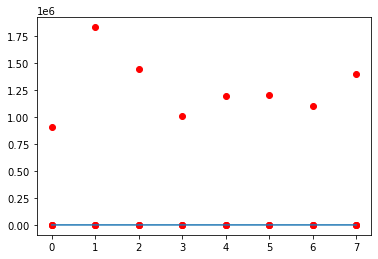

In [65]:
# 데이터 구조 보기 
plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

데이터 하단부에 데이터가 몰려있고, 극단값이 많은 경향을 보여줍니다.   
이 경우, 모형의 성능을 저해할 수 있기 때문에 정규화를 진행해 줍니다. 

### 데이터 정규화 진행 

In [66]:
# 정규화를 위한 함수 (최대값이 1, 최소값이 0이되도록 scaling 한다. 
def normalization(data):
    # (각 원소 - 최솟값) / (최대 - 최소) --> minmax scaling 
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data, 0)
    
    return numerator/denominator

In [67]:
xy = normalization(xy)
print(xy)

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [68]:
# 정규화를 완료한 데이터를 기반으로 데이터 셋을 다시 나눕니다. 
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]


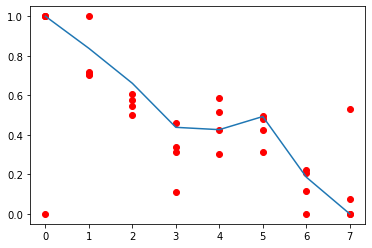

In [69]:
plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

값이 0에서 1 사이로 잘 나타남을 볼 수 있습니다. 

### 모형 구성 

#### 데이터 셋 구성 

* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* X(features),Y(labels)는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [70]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [72]:
print(list(dataset))

[(<tf.Tensor: shape=(8, 4), dtype=float64, numpy=
array([[1.        , 1.        , 0.        , 1.        ],
       [0.70548491, 0.70439552, 1.        , 0.71881783],
       [0.54412549, 0.50274824, 0.57608696, 0.60646801],
       [0.33890353, 0.31368023, 0.10869565, 0.45989134],
       [0.51436   , 0.4258239 , 0.30434783, 0.58504805],
       [0.49556179, 0.4258239 , 0.31521739, 0.48131134],
       [0.11436064, 0.        , 0.20652174, 0.22007776],
       [0.        , 0.07747099, 0.5326087 , 0.        ]])>, <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[1.        ],
       [0.83755792],
       [0.6606331 ],
       [0.43800918],
       [0.42624401],
       [0.49276137],
       [0.18597238],
       [0.        ]])>)]


#### 초기 가중치 설정

In [75]:
# 초기 가중치를 설정해줍니다. 

# x의 차원이 8,4 의 차원이 8,1이기 때문에 가중치의 차원은 4,1
W = tf.Variable(tf.random.normal((4,1)),dtype=tf.float32) 
# y의 차원이 8,1이기 때문에 
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

In [80]:
# print(b)

#### 가설 함수 정의  - Linear Regression 

In [81]:
# (y=Wx+b)
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

#### 비용함수 정의 - L2 Regularization을 통한 과적합 방지 

##### L1, L2 norm Regularization이란? 
* 기본적으로 모형에서 Overfitting이 발생하는 경우, 이를 해소하기 위해 사용됩니다. 
* 아래의 기존의 비용함수 대신,   
$$\frac{1}{M}\sum_{i=1}^{m}{\hat{Y_i} - Y_i}$$  
* 가중치를 L2 norm 정규화 한 값을 더해 줍니다.   
$$Cost =  \frac{1}{n}\sum_{i=1}^{n}{(L(y_i, \hat(y_i) + \frac{\lambda}{2}|w|)} = \frac{1}{M}\sum_{i=1}^{m}{((\hat{Y_i} - Y_i)^2 + \frac{\lambda}{2m}\sum_{j=1}^{m} {W_j^2})} (이때, \lambda{}의 값은 상수, 0에 가까울 수록 정규화의 효과 감소)$$  

* L1 norm - 각 weight의 절댓값의 합  
$$L1loss = \sum_{i=1}^{m}{|\hat{Y_i} - Y_i|}$$
* L2 - norm - 각 weigh들의 제곱 합  
$$L2loss = \sum_{i=1}^{m}{(\hat{Y_i} - Y_i)^2}$$  

**해당 개념은 추후 보강 학습예정입니다.**

##### Regularization이란? 
* 정규화 또는 일반화를 말하며, 모델의 복잡도에 대한 패널티를 의미한다. 
* 정규화는 과적합을 방지하고, 모형의 Generalization(일반화) 성능을 높이는데 도움을 줍니다. 
* Regularization의 방법으로는 L1 Regularization,L2 Regularization, Dropout, Early stopping 등이 있다. 
  
  model을 쉽게 만드는 방법은 단순하게 비용함수의 값이 작아지는 방향으로만 진행하는것이다.  
  하지만, 이런 방식으로 가중치를 변화시키는것은 특정 가중치가 너무 큰 값을 갖게 하는 경향이 있기 때문에 model의 일반화 성능이 떨아지게 될 것이다.(overfitting)  
    
   Regularization은 특정 가중치가 상대적으로 너무 큰 값을 갖지 않게 하여 과적합을 방지합니다. 
* L1 Regularization을 사용하는 Regression model을 Lasso Regression(Least Absolute Shrinkage and Selection Operator Regression)이라 부른다. 
* L2 Regularization을 사용하는 Regression model을 Ridge Regression 이라 부릅니다. 

##### 요약 
* L2 Regularization의 경우, 가중치의 크기 또한 일종의 비용으로 인지해, 가중치가 너무 크지 않은 동시에 비용이 최소가 되는 방향으로 모형을 학습 시킴을 의미합니다. 

In [88]:
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

In [89]:
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

### Learning Rate 값을 조정하기 위한 Learning Decay 설정
* 5개 파라미터 설정
    - starter_learning_rate : 최초 학습시 사용될 learning rate (0.1로 설정하여 0.96씩 감소하는지 확인)  
    - global_step : 현재 학습 횟수  
    - 1000 : 곱할 횟수 정의 (1000번에 마다 적용)  
    - 0.96 : 기존 learning에 곱할 값  
    - 적용유무 decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)  
    - decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)  

##### Anneling the learning rate 
* learing rate를 특정 값으로 고정할 경우, 아래와 같은 문제가 발생할 수 있습니다. 
![Annealing1.img](https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png)
![Annealing2.img](https://srdas.github.io/DLBook/DL_images/TNN7.png)
* 즉, 비용의 최소점에 도달하지 않아도, learning rate에 따라 비용이 특정 위치에 수렴할 수 있습니다. 
  
  따라서, learning rate의 값을 주기적으로 바꾸어 주며 학습을 진행합니다. 
* 해당 방안을 고안하는데 사용되는 방법으로는 크게 세가지가 있습니다. 
    1. Steping decay : 특정 반복횟수마다(or 특정 validation loss에서) 값을 변경시킵니다.
    2. Exponentialdecay : a = a_0 x e^(kt), 즉 매 횟수(t)에 비례하여 지수승으로 값을 감소시킵니다. (k는 지정하는 상수) 
    3. 1/t decay : a = a_0/(1+kt) 

* 이 장에서는 Exponential decay를 활용해 값을 조정합니다. 

In [84]:
# 방법1. tensorflow 제공 tf.train.exponential_decay 메소드 활용 

is_decay = True # decay를 이용할것인지 결정하는 변수 

# 시작 학습률 정의 
start_learnig_rate = 0.1 

# decay의 값에 따라 적용 
if(is_decay):
    # tensorflow 제공 tf.train.exponential_decay 메소드
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = start_learnig_rate,
                                                                  decay_steps = 50,
                                                                  decay_rate = 0.96,
                                                                  staircase = True)# 50번에 1번씩 k(=0.96) 만큼
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else: 
    # 그대로 적용 
    optimizer = tf.keras.optimizers.SGD(learning_rate= start_learnig_rate)
    

In [85]:
# 방법 2 . 직접 구현하기 
def exponential_decay(epoch):
    starter_learnig_rate = 0.01
    k = 0.96
    exp_rate = starter_learnig_rate * exp(-k*t)
    return exp_rate

# 이후 반복문에서 지속 적용해준다. 

### Gradient tape을 이용한 기울기 함수 정의 

In [86]:
def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

### 학습 

In [90]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 0.4504
Iter: 10, Loss: 0.3120
Iter: 20, Loss: 0.2338
Iter: 30, Loss: 0.1754
Iter: 40, Loss: 0.1318
Iter: 50, Loss: 0.0992
Iter: 60, Loss: 0.0758
Iter: 70, Loss: 0.0580
Iter: 80, Loss: 0.0446
Iter: 90, Loss: 0.0345
Iter: 100, Loss: 0.0268
